In [1]:
from textblob import TextBlob
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer



# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools



In [2]:
df=pd.read_csv('../data/mbti_1.csv')

In [3]:
gr = df.groupby('type').count()
gr.sort_values("posts", ascending=False, inplace=True)
gr

,posts
type,
INFP,1832
INFJ,1470
INTP,1304
INTJ,1091
ENTP,685
ENFP,675
ISTP,337
ISFP,271
ENTJ,231


<AxesSubplot:title={'center':'Number of Posts per Personality type'}, xlabel='type'>

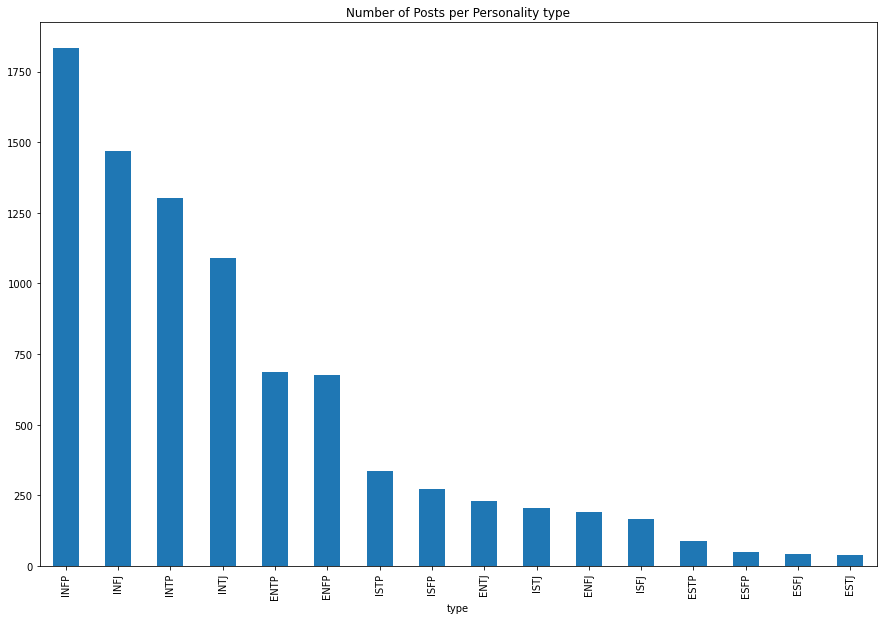

In [4]:
plt.figure(figsize=(15,10))
gr['posts'].plot(kind='bar',title="Number of Posts per Personality type")

# first we try word generation of one personality

In [5]:
df=df[df['type']=='INFP']

In [6]:
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        if 'http' not in post:
            new_posts.append((posts[0], post))

posts = []
df.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(df))
print("Number of posts", len(posts))

Number of users 1832
Number of posts 83770


In [119]:
new_df = pd.DataFrame(posts, columns=["type", "posts"])
new_df.head(100)

,type,posts
0,INFP,'I think we do agree. I personally don't consi...
1,INFP,Literature... I'd suggest 'Everyday Zen' by Ch...
2,INFP,Being emotional doesn't automatically make som...
3,INFP,"I'm a Ch'an Buddhist, so it's a daily thing fo..."
4,INFP,"Glad to know I'm not the only one. I meditate,..."
...,...,...
95,INFP,"As others said ere, you are an obvious ISFP. Y..."
96,INFP,ISFPs are among the extremely few types I'd li...
97,INFP,As though :emmersed: :winky:
98,INFP,Nobody has voted for Ni. Looks like a lot of ...


In [120]:
X=new_df.posts
len(X)

83770

In [121]:
import re
X=new_df.posts
for n in range(len(X)):
    X[n]=re.sub("[^\w]", " ",X[n] ).split()

In [123]:
def get_X_y(string, length=10):
    if len(string) <= length:
        return None
    
    
    first_word_idx = np.random.randint(0, len(string)-length)
    
    X_words = string[first_word_idx:first_word_idx+length]
    y_words = string[first_word_idx+length]
    
    return X_words, y_words

In [125]:
get_X_y(X1[0])

(['We',
  'both',
  'agree',
  'that',
  'having',
  'emotions',
  'isn',
  't',
  'the',
  'same'],
 'as')

In [126]:
def create_dataset(sentences,number_of_samples = 100000):
    
    X, y = [], []
    number_of_samples = number_of_samples
    indices = np.random.randint(0, len(sentences), size=number_of_samples)
    
    for idx in indices:
        ret = get_X_y(sentences[idx])
        if ret is None:
            continue
        xi, yi = ret
        X.append(xi)
        y.append(yi)
        
    return X, y

X1, y = create_dataset(X)

In [127]:
len_ = int(0.7*len(X1))

string_train = X1[:len_]
string_test = X1[len_:]

y_train = y[:len_]
y_test = y[len_:]

In [138]:
word_to_id = {}
word_to_id['UNKNOWN'] = 0

iter_ = 1
for string in string_train:
    for word in string:
        if word in word_to_id:
            continue
        word_to_id[word] = iter_
        iter_ += 1
        
for string in y_train:
#     for word in string:
    if string in word_to_id:
        continue
    word_to_id[string] = iter_
    iter_ += 1

In [139]:
y_train[7]

'politically'

In [140]:
X_train = [[word_to_id[_] for _ in x] for x in string_train]
X_test = [[word_to_id[_] if _ in word_to_id else word_to_id['UNKNOWN'] for _ in x ] for x in string_test]

X_train = np.array(X_train)
X_test = np.array(X_test)

In [141]:
from sklearn.metrics import accuracy_score

unique, counts = np.unique(y_train, return_counts=True)
counts = dict(zip(unique, counts))
# print('Number of labels in train set', counts)

w = -1
y_pred = ''
for k, v in counts.items():
    if v > w:
        y_pred = k
        w = v

print('Baseline accuracy: ', accuracy_score(y_test, [y_pred]*len(y_test)))

Baseline accuracy:  0.04265309343434343


In [142]:
y_train_token = [word_to_id[x] for x in y_train]
y_test_token = [word_to_id[x] if x in word_to_id else word_to_id['UNKNOWN'] for x in y_test]

In [88]:
y_train_token

[1445,
 56,
 4517,
 35,
 24,
 114,
 0,
 10311,
 102,
 52,
 32,
 176,
 313,
 2793,
 21,
 24,
 11,
 601,
 162,
 100,
 438,
 1341,
 196,
 0,
 480,
 24,
 3,
 52,
 817,
 381,
 2273,
 46,
 1413,
 1843,
 176,
 10157,
 22,
 185,
 40,
 108,
 21,
 7468,
 100,
 304,
 24,
 310,
 59,
 1671,
 2089,
 113,
 3546,
 0,
 5,
 57,
 306,
 21,
 124,
 190,
 22,
 261,
 92,
 248,
 470,
 498,
 24,
 5136,
 57,
 0,
 1350,
 83,
 4,
 4604,
 46,
 74,
 789,
 830,
 1988,
 192,
 68,
 763,
 138,
 5263,
 4300,
 599,
 835,
 4761,
 10,
 71,
 64,
 1803,
 40,
 123,
 647,
 2144,
 3540,
 2742,
 100,
 0,
 219,
 399,
 7,
 4,
 13,
 0,
 9374,
 4289,
 4014,
 667,
 32,
 38,
 246,
 549,
 306,
 5691,
 3,
 11,
 3039,
 318,
 886,
 46,
 6407,
 10,
 22,
 539,
 59,
 4722,
 3,
 40,
 0,
 7,
 10344,
 885,
 3042,
 0,
 0,
 1489,
 304,
 7612,
 24,
 738,
 469,
 7,
 860,
 52,
 784,
 5,
 399,
 575,
 46,
 1279,
 5351,
 6084,
 111,
 13,
 5385,
 301,
 46,
 7,
 113,
 24,
 2979,
 24,
 4492,
 92,
 2929,
 4156,
 3,
 2066,
 2754,
 1130,
 520,
 31,
 3,
 25,


In [143]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train_token, num_classes=len(word_to_id))
y_test_cat = to_categorical(y_test_token, num_classes=len(word_to_id))



In [144]:
from tensorflow.keras import Sequential, layers

def init_model(vocab_size):
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, output_dim=30))
    model.add(layers.GRU(30, activation='tanh'))
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(vocab_size, activation='softmax'))
    
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

model = init_model(len(word_to_id))

In [145]:
len(y_train_cat)

59133

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, monitor='val_loss')

model = init_model(len(word_to_id))
model.fit(X_train, y_train_cat,
          epochs=400, 
          batch_size=50,
          callbacks=[es],
          validation_split=0.3)

Epoch 1/400
828/828 [==============================] - 46s 56ms/step - loss: 7.2517 - accuracy: 0.0386 - val_loss: 6.9895 - val_accuracy: 0.0406
Epoch 2/400
828/828 [==============================] - 44s 54ms/step - loss: 6.8569 - accuracy: 0.0396 - val_loss: 6.9159 - val_accuracy: 0.0406
Epoch 3/400
789/828 [===========================>..] - ETA: 1s - loss: 6.7108 - accuracy: 0.0476

In [ ]:
model.evaluate(X_test, y_test_cat)